# Demonstration of added utility depending on time to IVT and MT

In this notebook we examine the relationship between time to treatment and the effect of treatment.

Outcome results are calculated for three patients groups:

1. nLVO receiving IVT
2. LVO receiving IVT only
3. LVO receiving MT (data based on trails where 85% had also received IVT)

When we look at combined effect of these groups, we make some basic assumptions (which are used as being 'reasonable' rather than 'definitive'):

* 20% of all ischaemic stroke admissions receive IVT and/or MT.
* 35% of our treated population have LVO.
* 28.6% of LVO receive MT (this gives 10% of all ischaemic strokes receiving MT)
* 85% of LVO receiving MT have received IVT (from clinical trials  data); for those 85% if the benefit of IVT exceed the benefit of MT (e.g. very early IVT, and very late MT), then the benefit is based on IVT.
* 15.5% nLVO receive thrombolysis (this brings total IVT to 20% use).


## Load packages

In [1]:
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
import pandas as pd
from outcome_utilities.clinical_outcome import Clinical_outcome

import warnings
warnings.filterwarnings("ignore")

## Load mRS distributions

In [2]:
mrs_dists = pd.read_csv(
    './outcome_utilities/mrs_dist_probs_cumsum.csv', index_col='Stroke type')

## Set up model

In [3]:
# Set up outcome model
outcome_model = Clinical_outcome(mrs_dists)

## Individial treatment effects

Here we consider the impact, and effect of time to treatment, for three cohorts independently:

1. nLVO receiving IVT
2. LVO receiving IVT only
3. LVO receiving MT (data based on trails where 85% had also received IVT)

In [4]:
##### nlvo IVT #####

# # Set up variables
# prop_lvo = 0.0; prop_nlvo = 1.0
# prop_lvo_treated_ivt_only = 0
# prop_lvo_treated_ivt_mt = 1
# prop_nlvo_treated_ivt_only = 1
max_time_to_ivt = 6.3 * 60
max_time_to_mt = 480

times_ivt = np.linspace(0, max_time_to_ivt, 21)
time_to_mt = 480

# Get results
added_utility_nlvo_ivt = []
mean_mrs_nlvo_ivt = []
mrs_less_equal_2_nlvo_ivt = []

for ivt in times_ivt:
    outcomes = outcome_model.calculate_outcomes(
        ivt, time_to_mt, patients=10000, random_spacing=False)
    added_utility_nlvo_ivt.append(outcomes['nlvo_ivt_added_utility'])
    mean_mrs_nlvo_ivt.append(outcomes['nlvo_ivt_mean_mRS'])
    mrs_less_equal_2_nlvo_ivt.append(outcomes['nlvo_ivt_cum_probs'][2])


##### LVO IVT #####

# # Set up variables
# prop_lvo = 1.0; prop_nlvo = 0.0
# prop_lvo_treated_ivt_only = 0
# prop_lvo_treated_ivt_mt = 0
# prop_nlvo_treated_ivt_only = 0
# max_time_to_ivt = 6.3 * 60
# max_time_to_mt = 480

times_ivt = np.linspace(0, max_time_to_ivt, 21)
time_to_mt = 480

# Get results
added_utility_lvo_ivt = []
mean_mrs_lvo_ivt = []
mrs_less_equal_2_lvo_ivt = []

for ivt in times_ivt:
    outcomes = outcome_model.calculate_outcomes(ivt, time_to_mt, 
        patients=10000, random_spacing=False)
    added_utility_lvo_ivt.append(outcomes['lvo_ivt_added_utility'])
    mean_mrs_lvo_ivt.append(outcomes['lvo_ivt_mean_mRS'])
    mrs_less_equal_2_lvo_ivt.append(outcomes['lvo_ivt_cum_probs'][2])

##### LVO MT #####

# # Set up variables
# prop_lvo = 1.0; prop_nlvo = 0.0
# prop_lvo_treated_ivt_only = 0
# prop_lvo_treated_ivt_mt = 1
# prop_nlvo_treated_ivt_only = 0
# max_time_to_ivt = 6.3 * 60
# max_time_to_mt = 480

times_mt = np.linspace(0, max_time_to_mt, 21)
time_to_ivt = 6/3 * 60

# Get results
added_utility_lvo_mt = []
mean_mrs_lvo_mt = []
mrs_less_equal_2_lvo_mt = []

for mt in times_mt:
    outcomes = outcome_model.calculate_outcomes(time_to_ivt, mt, 
        patients=10000, random_spacing=False)
    added_utility_lvo_mt.append(outcomes['lvo_mt_added_utility'])
    mean_mrs_lvo_mt.append(outcomes['lvo_mt_mean_mRS'])
    mrs_less_equal_2_lvo_mt.append(outcomes['lvo_mt_cum_probs'][2])

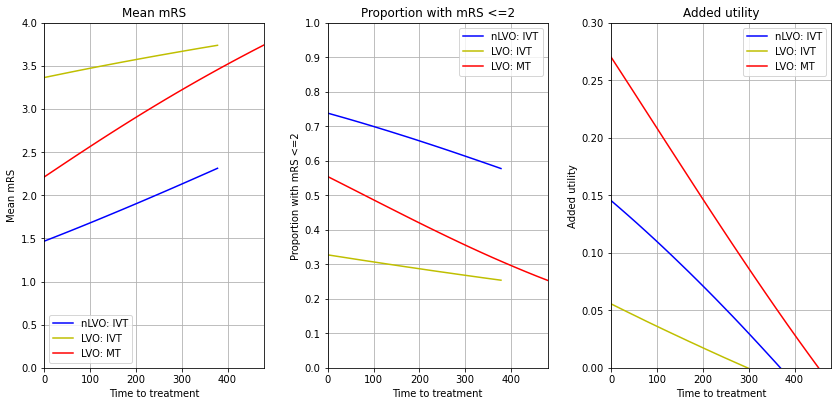

In [5]:
# Plot
fig = plt.figure(figsize=(12,6))

# Mean mRS
ax1 = fig.add_subplot(131)
ax1.plot(times_ivt, mean_mrs_nlvo_ivt, c='b', label='nLVO: IVT')
ax1.plot(times_ivt, mean_mrs_lvo_ivt, c='y', label='LVO: IVT')
ax1.plot(times_mt, mean_mrs_lvo_mt, c='r', label='LVO: MT')
ax1.set_xlim(0, max_time_to_mt)
ax1.set_ylim(0, 4)
ax1.set_xlabel('Time to treatment')
ax1.set_ylabel('Mean mRS')
ax1.set_title('Mean mRS')
ax1.legend()
ax1.grid()

# mRS <= 2
ax2 = fig.add_subplot(132)
ax2.plot(times_ivt, mrs_less_equal_2_nlvo_ivt, c='b', label='nLVO: IVT')
ax2.plot(times_ivt, mrs_less_equal_2_lvo_ivt, c='y', label='LVO: IVT')
ax2.plot(times_mt, mrs_less_equal_2_lvo_mt, c='r', label='LVO: MT')
ax2.set_xlim(0, max_time_to_mt)
ax2.set_ylim(0, 1)
ax2.set_yticks(np.arange(0, 1.01, 0.1))
ax2.set_xlabel('Time to treatment')
ax2.set_ylabel('Proportion with mRS <=2')
ax2.set_title('Proportion with mRS <=2')
ax2.legend()
ax2.grid()

# Added utility
ax3 = fig.add_subplot(133)
ax3.plot(times_ivt, added_utility_nlvo_ivt, c='b', label='nLVO: IVT')
ax3.plot(times_ivt, added_utility_lvo_ivt, c='y', label='LVO: IVT')
ax3.plot(times_mt, added_utility_lvo_mt, c='r', label='LVO: MT')
ax3.set_xlim(0, max_time_to_mt)
ax3.set_ylim(0)
ax3.set_yticks(np.arange(0, 0.31, 0.05))
ax3.set_xlabel('Time to treatment')
ax3.set_ylabel('Added utility')
ax3.set_title('Added utility')
ax3.legend()
ax3.grid()

plt.tight_layout(pad=2)
plt.savefig('./images/time_to_treatment.jpg', dpi=300)

plt.show()

## Combining patient groups

Here we examined the combined effect of IVT and MT on outcomes across nLVO and LVO ischaemic strokes.

In this example, we make some basic assumptions:

* 20% of all stroke admissions receive IVT and/or MT.
* 35% of our treated population have LVO.
* 28.6% of LVO receive MT (this gives 10% of all ischaemic strokes receiving MT)
* 85% of LVO receiving MT have received IVT (from clinical trials  data); for those 85% if the benefit of IVT exceed the benefit of MT (e.g. very early IVT, and very late MT), then the benefit is based on IVT.
* 15.5% nLVO receive thrombolysis (this brings total IVT to 20% use).

In [6]:
patient_props = dict(
    lvo = 0.35,
    nlvo = 1.0-0.35, # 1-LVO
    lvo_mt_also_receiving_ivt = 0.85,
    lvo_treated_ivt_only = 0.0,
    lvo_treated_ivt_mt = 0.286,    # 0.286 gives 10% final MT if 35%LVO
    nlvo_treated_ivt_only = 0.155, # 0.155 gives final 20% IVT
    )

treated_population = (
    patient_props['nlvo'] * patient_props['nlvo_treated_ivt_only'] +
    patient_props['lvo'] * patient_props['lvo_treated_ivt_mt'] +
    patient_props['lvo'] * patient_props['lvo_treated_ivt_only']
    )

patient_props['treated_population'] = treated_population

In [7]:
df_patients = pd.DataFrame(patient_props.values(), 
    index=patient_props.keys(), columns=['Proportion of patient population'])
df_patients['Comment'] = [
    'Proportion of LVO',
    'Proportion of nLVO', 
    'Proportion LVO MT also receiving IVT',
    'Proportion LVO admissions treated with IVT only',
    'Proportion LVO admissions treated with MT',
    'Proportion nLVO admissions treated with IVT',
    'Proportion all admissions treated'
    ]

df_patients

,Proportion of patient population,Comment
lvo,0.35000,Proportion of LVO
nlvo,0.65000,Proportion of nLVO
lvo_mt_also_receiving_ivt,0.85000,Proportion LVO MT also receiving IVT
lvo_treated_ivt_only,0.00000,Proportion LVO admissions treated with IVT only
lvo_treated_ivt_mt,0.28600,Proportion LVO admissions treated with MT
nlvo_treated_ivt_only,0.15500,Proportion nLVO admissions treated with IVT
treated_population,0.20085,Proportion all admissions treated


### Calculate outcomes for this group at different times:

The following function is used in the loops above to calculate the weighted change in utility and in mRS.

In [8]:
def find_weighted_change(change_lvo_ivt, change_lvo_mt, change_nlvo_ivt, 
                         patient_props):
    """
    Take the total changes for each category and calculate their
    weighted sum, where weights are from the proportions of the 
    patient population.
    
    (originally from matrix notebook)
    
    Inputs:
    
    Returns:
    
    """
    # If LVO-IVT is greater change than LVO-MT then adjust MT for 
    # proportion of patients receiving IVT:
    if change_lvo_ivt > change_lvo_mt:
        diff = change_lvo_ivt - change_lvo_mt
        change_lvo_mt += diff * patient_props['lvo_mt_also_receiving_ivt']

    # Calculate weighted changes (wc):
    wc_lvo_mt = (change_lvo_mt * 
        patient_props['lvo'] * patient_props['lvo_treated_ivt_mt'])
    wc_lvo_ivt = (change_lvo_ivt * 
        patient_props['lvo'] * patient_props['lvo_treated_ivt_only'])
    wc_nlvo_ivt = (change_nlvo_ivt *
        patient_props['nlvo'] * patient_props['nlvo_treated_ivt_only'])
        
    total_change = wc_lvo_mt + wc_lvo_ivt + wc_nlvo_ivt
    return total_change

The following cell generates the time grids of mRS and utility:

In [9]:
max_time_to_ivt = 270
max_time_to_mt = 480

time_to_ivt = np.arange(0, max_time_to_ivt + 1, 10)
time_to_mt = np.arange(0, max_time_to_mt + 1, 10)
results_util = np.empty(shape=(len(time_to_mt), len(time_to_ivt)))
results_mRS = np.empty(shape=(len(time_to_mt), len(time_to_ivt)))


for x, ivt in enumerate(time_to_ivt):
    for y, mt in enumerate(time_to_mt):
        outcomes = outcome_model.calculate_outcomes(
            ivt, mt, patients=10000, random_spacing=False)
        
        # Find the change in utility:
        added_utility = find_weighted_change(
            outcomes['lvo_ivt_added_utility'],
            outcomes['lvo_mt_added_utility'],
            outcomes['nlvo_ivt_added_utility'],
            patient_props
            )
        # Add this value to the grid:
        results_util[y,x] = added_utility

        # Find the change in mRS:
        reduced_mRS = find_weighted_change(
            outcomes['lvo_ivt_mean_shift'], 
            outcomes['lvo_mt_mean_shift'],
            outcomes['nlvo_ivt_mean_shift'], 
            patient_props
            )
        # Add this value to the grid:
        results_mRS[y,x] = reduced_mRS
            
            
# Adjust outcome for just treated population
results_util = results_util / patient_props['treated_population']
results_mRS = results_mRS / patient_props['treated_population']

### Plot the resulting grids:

In [10]:
def plot_results(results, time_to_ivt, time_to_mt,
                 title=' ', filename='test', cbar_label='',
                 aspect='auto', figsize=(6,5), vmin=None, vmax=None,
                 cmap='gnuplot'):
    
    time_step_ivt = time_to_ivt[1] - time_to_ivt[0]
    time_step_mt  = time_to_mt[1]  - time_to_mt[0]
    extent = [time_to_ivt[0]  - time_step_ivt*0.5, 
              time_to_ivt[-1] + time_step_ivt*0.5, 
              time_to_mt[0]   - time_step_mt *0.5,  
              time_to_mt[-1]  + time_step_mt *0.5]

    fig = plt.figure(figsize=figsize)
    ax = fig.add_subplot()
    
    img1 = ax.contour(results,
                colors='k',
                linewidths=0.5,
                vmin=vmin,
                vmax=vmax,
                extent=extent,
                aspect=aspect)
    
    ax.clabel(img1, inline=True, fontsize=10)

    img2 = ax.imshow(results, interpolation='nearest', origin='lower',
                cmap=cmap,
                vmin=vmin,
                vmax=vmax,
                extent=extent,
                aspect=aspect)
    
    
    ax.set_xlabel('Time to IVT (mins) if applicable')
    ax.set_ylabel('Time to MT (mins) if applicable')
    ax.set_xticks(np.arange(0, max_time_to_ivt + 1, 30))
    ax.set_yticks(np.arange(0, max_time_to_mt + 1, 60))
    fig.colorbar(img2, label=cbar_label)
    ax.set_title(title)
    plt.savefig(f'./images/{filename}.jpg', dpi=300)
    plt.show()

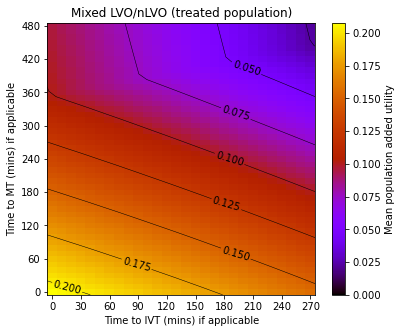

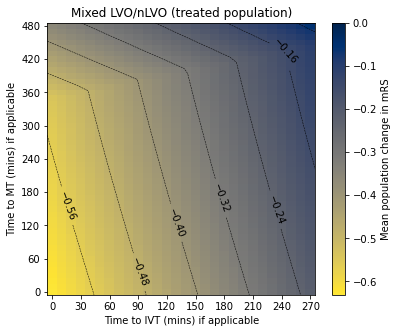

In [11]:
plot_results(results_util, time_to_ivt, time_to_mt,
             'Mixed LVO/nLVO (treated population)', 'utility_all',
             cbar_label='Mean population added utility', vmin=0)
plt.show()

plot_results(results_mRS, time_to_ivt, time_to_mt,
             'Mixed LVO/nLVO (treated population)', 'mRS_all',
             cbar_label='Mean population change in mRS',
             cmap='cividis_r', vmax=0)
plt.show()